In [7]:
from config import *
from pandas import read_csv
import plotnine as pn

In [8]:
true_results = read_csv(
    os.path.join(RESULTS_DIR, "sim_output.csv"),
    dtype={
        "age": "string"
    },
    parse_dates=[2],
    index_col=0
)
true_results.describe()

,sim,date,incidence,prevalence,num_tests,obs_positives,obs_prevalence
count,88200.000000,88200,88200.000000,88200.000000,88200.000000,88200.000000,88200.000000
mean,49.500000,2020-11-12 00:00:00,0.001211,0.021563,2499.500000,49.128197,0.021552
min,0.000000,2020-08-31 00:00:00,0.000001,0.000044,853.000000,0.000000,0.000000
25%,24.750000,2020-10-06 00:00:00,0.000234,0.003209,1609.000000,7.000000,0.003074
50%,49.500000,2020-11-12 00:00:00,0.000667,0.012509,1998.500000,25.000000,0.012430
75%,74.250000,2020-12-19 00:00:00,0.001562,0.029208,3578.000000,63.000000,0.029234
max,99.000000,2021-01-24 00:00:00,0.026650,0.374676,4960.000000,1466.000000,0.376319
std,28.866234,NaN,0.001598,0.027752,1367.772932,72.658403,0.027925


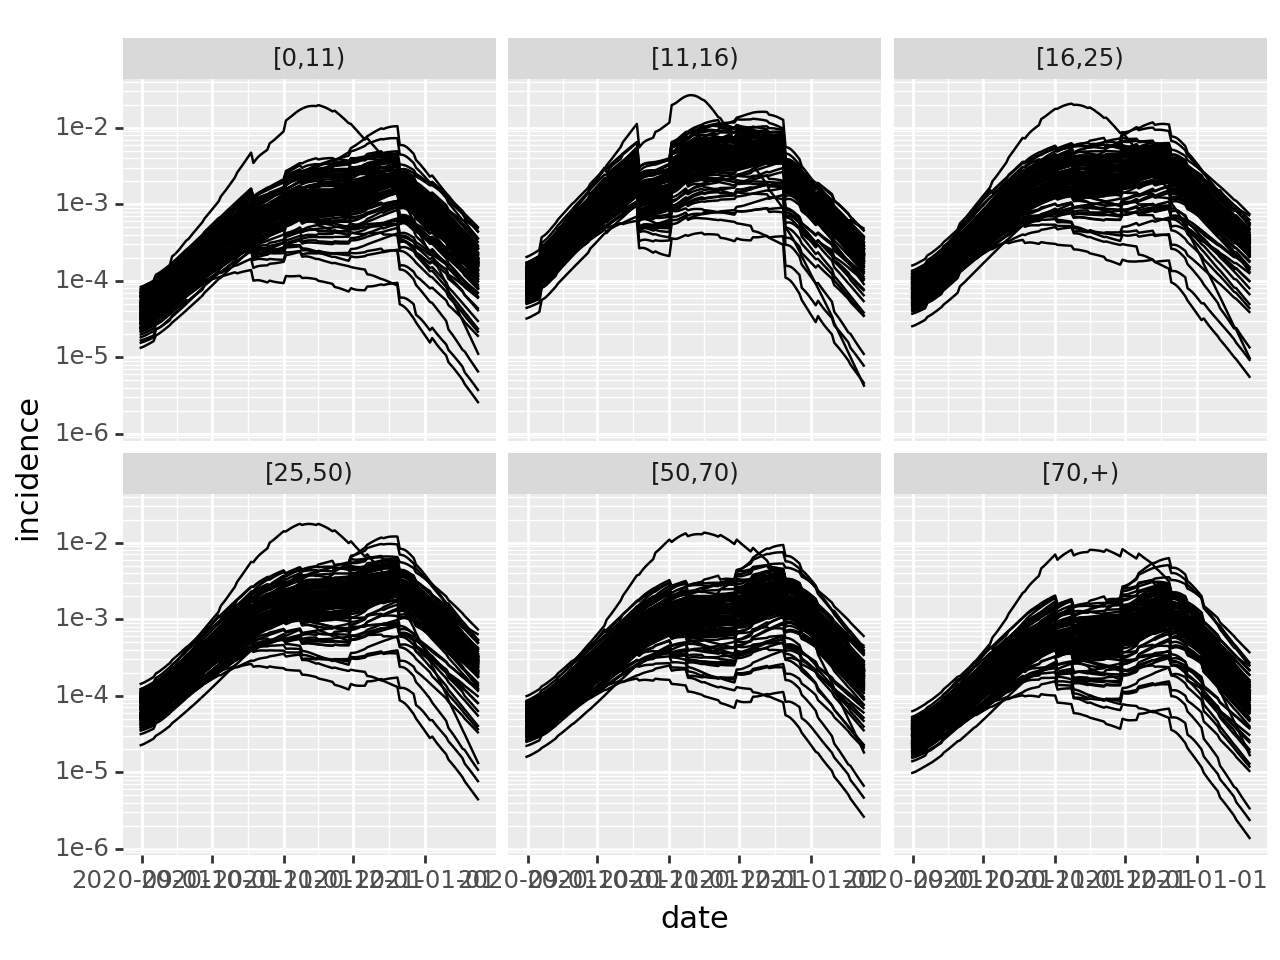

<Figure Size: (640 x 480)>

In [9]:
(
    pn.ggplot(true_results.reset_index(), pn.aes("date", "incidence", group="sim")) +
    pn.geom_line() +
    pn.scale_y_log10() +
    pn.facet_wrap("~age")
)

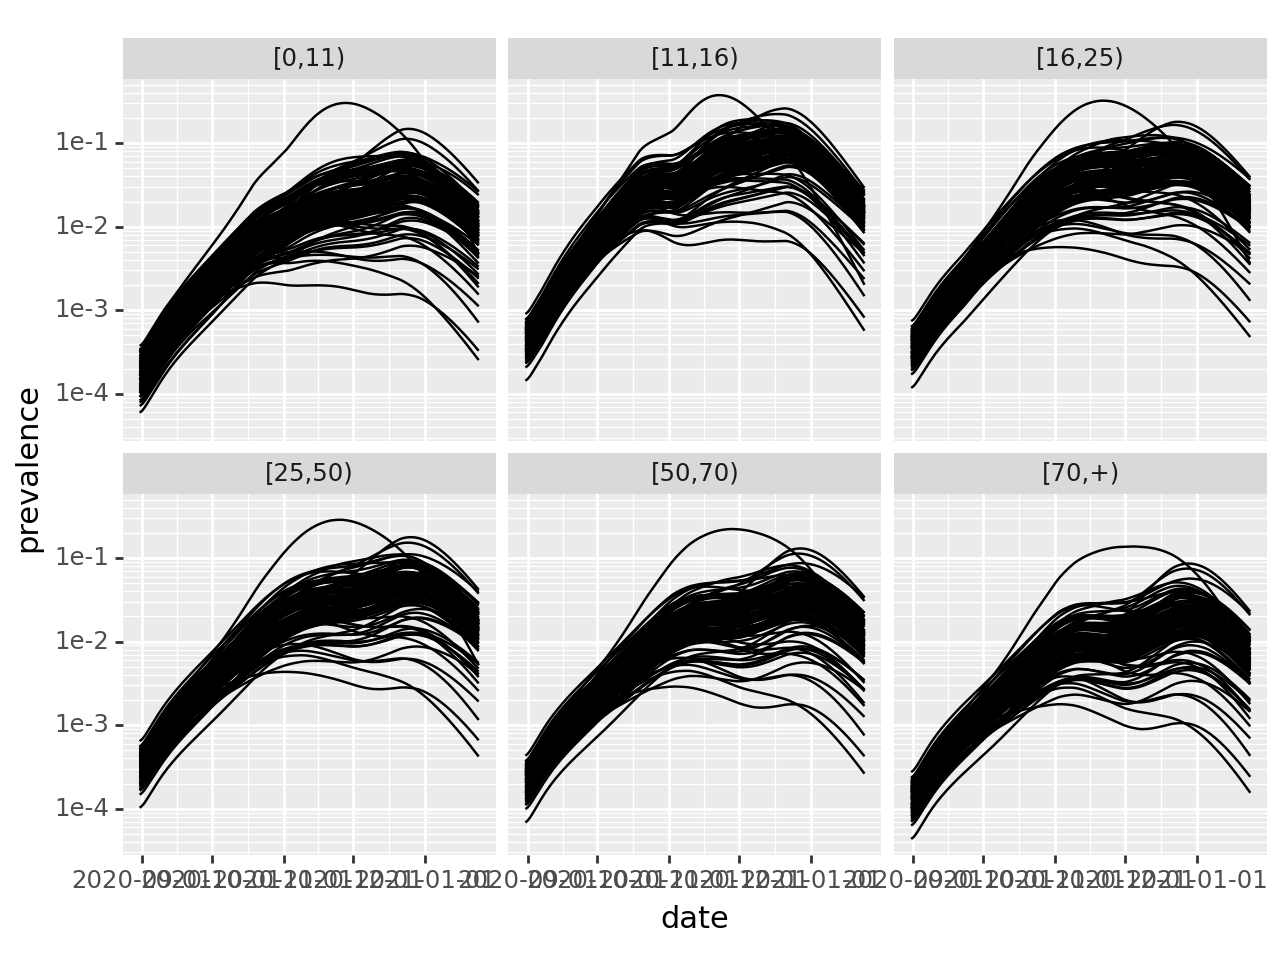

<Figure Size: (640 x 480)>

In [10]:
(
    pn.ggplot(true_results.reset_index(), pn.aes("date", "prevalence", group="sim")) +
    pn.geom_line() +
    pn.scale_y_log10() +
    pn.facet_wrap("~age")
)

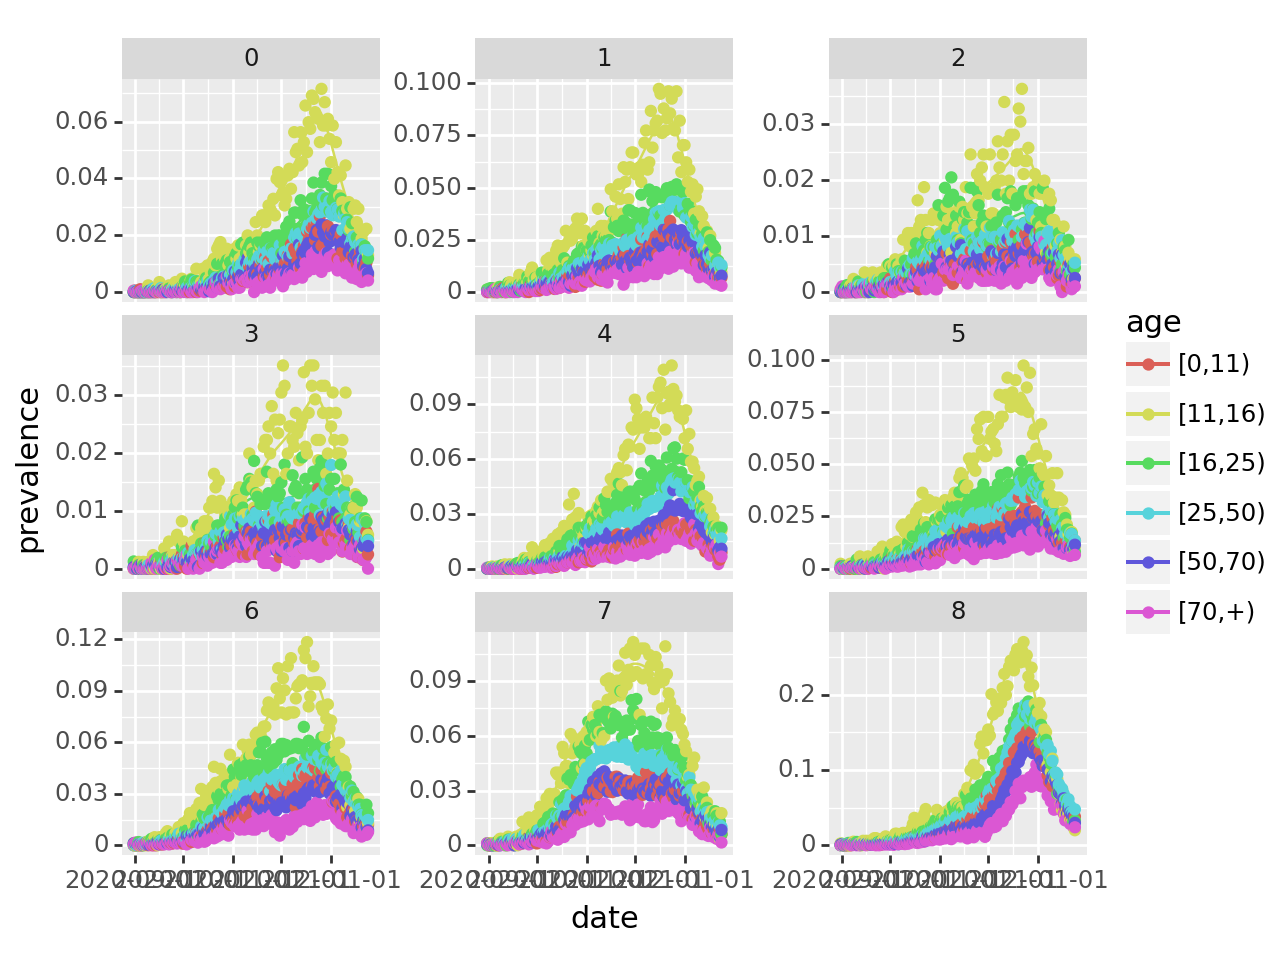

<Figure Size: (640 x 480)>

In [11]:
(
    pn.ggplot(true_results[true_results["sim"] < 9], pn.aes("date", "prevalence", colour = "age")) +
    pn.geom_line() +
    pn.geom_point(pn.aes(y="obs_prevalence")) +
    pn.facet_wrap("~sim",scales="free_y")
)

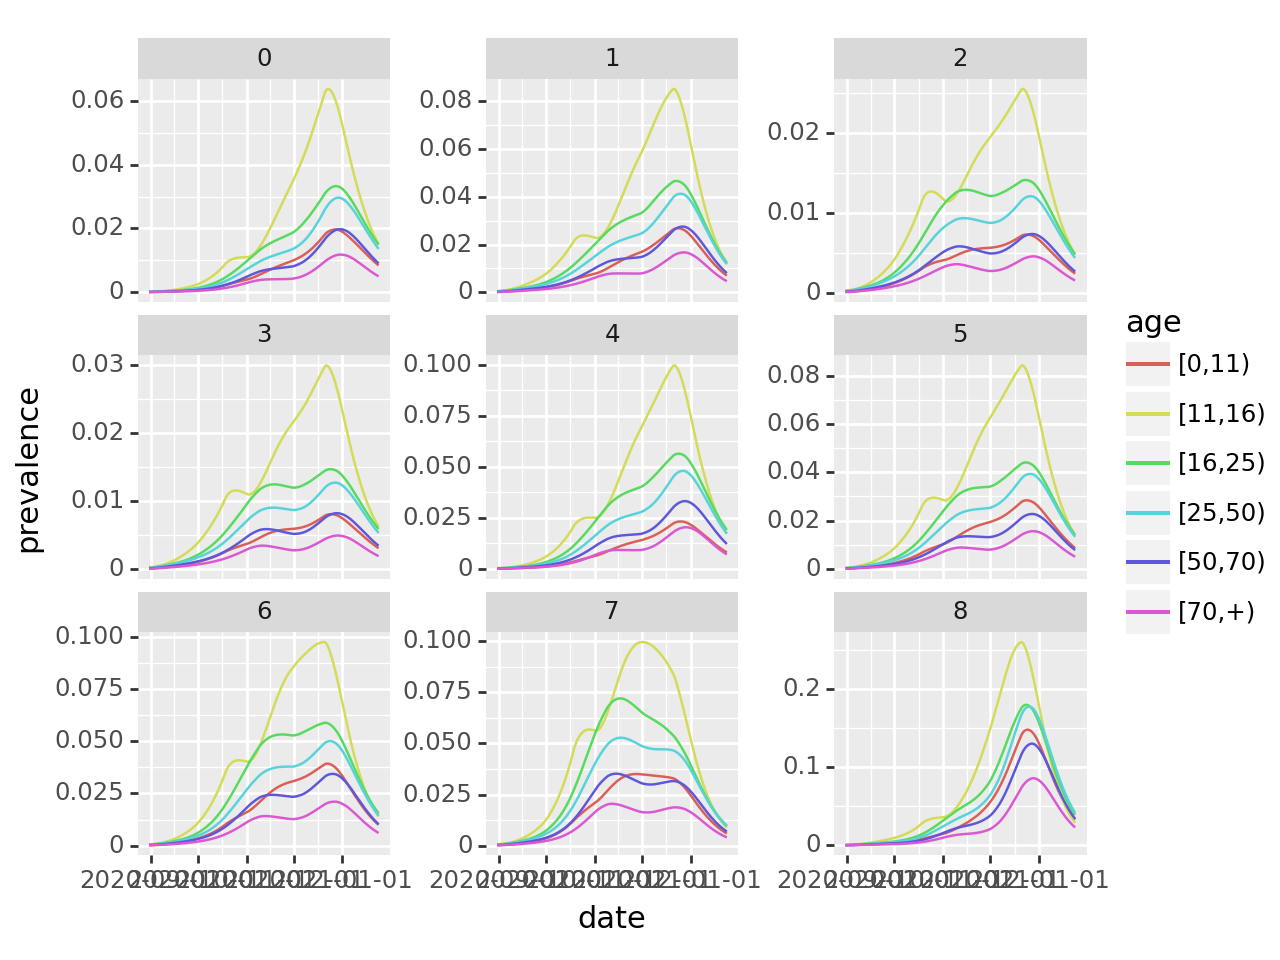

<Figure Size: (640 x 480)>

In [12]:
(
    pn.ggplot(true_results[true_results["sim"] < 9], pn.aes("date", "prevalence", colour = "age")) +
    pn.geom_line() +
    pn.facet_wrap("~sim",scales="free_y")
)